### Multi-Layer Perceptron 

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
import tensorflow as tf
from sklearn import (
    linear_model, metrics, neural_network, pipeline, model_selection
)
from sklearn.impute import SimpleImputer

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import TimeSeriesSplit

In [103]:
# import the data
netflix = pd.read_csv('netflix_model_ready.csv')

In [104]:
# Change "date" column to ensure datetime type and drop weekends
netflix["date"] = pd.to_datetime(netflix["date"])

#### MPL With Features From Feature Selection Process

In [210]:
# TimeSeriesSplit the data
tss = TimeSeriesSplit(n_splits=5)

# Create feature dataframe based on feature selection results
X = netflix[["date", "Google_rs", "Dow_MAvg_s_Move", "Stock_gain", "Volume", "Dow_loss", "Dow_diff", 
             "Google_MAvg_s", "Google_MAvg", "Google_EMA", "Wiki_Move"]]

X = X.set_index("date")

# Create y target dataset
y = netflix["target_3"]

for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [211]:
# Print index of train and test data to check that they are split correctly
print(X_train.index)
print(X_test.index)

DatetimeIndex(['2019-01-23', '2019-01-24', '2019-01-25', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01',
               '2019-02-04', '2019-02-05',
               ...
               '2021-09-21', '2021-09-22', '2021-09-23', '2021-09-24',
               '2021-09-27', '2021-09-28', '2021-09-29', '2021-09-30',
               '2021-10-01', '2021-10-04'],
              dtype='datetime64[ns]', name='date', length=601, freq=None)
DatetimeIndex(['2021-10-05', '2021-10-06', '2021-10-07', '2021-10-08',
               '2021-10-12', '2021-10-13', '2021-10-14', '2021-10-15',
               '2021-10-18', '2021-10-19',
               ...
               '2022-03-17', '2022-03-18', '2022-03-21', '2022-03-22',
               '2022-03-23', '2022-03-24', '2022-03-25', '2022-03-28',
               '2022-03-29', '2022-03-30'],
              dtype='datetime64[ns]', name='date', length=120, freq=None)


In [234]:
# Standardize the data
scaler = MinMaxScaler()
X_train_pca = scaler.fit_transform(X_train)
X_test_pca = scaler.fit_transform(X_test)

In [235]:
# Build MPL model
n_features = X_train_pca.shape[1]
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=10)
history

# predict on test data
y_pred = model.predict(X_test)

Epoch 1/50
55/55 [==============================] - 0s 3ms/step - loss: 40779112.0000 - accuracy: 0.4917 - val_loss: 3731636.5000 - val_accuracy: 0.5056
Epoch 2/50
55/55 [==============================] - 0s 1ms/step - loss: 5285714.5000 - accuracy: 0.4824 - val_loss: 2017997.3750 - val_accuracy: 0.4944
Epoch 3/50
55/55 [==============================] - 0s 1ms/step - loss: 1086509.6250 - accuracy: 0.4972 - val_loss: 1068901.8750 - val_accuracy: 0.4944
Epoch 4/50
55/55 [==============================] - 0s 2ms/step - loss: 1274632.8750 - accuracy: 0.4603 - val_loss: 567826.6875 - val_accuracy: 0.4944
Epoch 5/50
55/55 [==============================] - 0s 2ms/step - loss: 1555747.0000 - accuracy: 0.5287 - val_loss: 4394746.5000 - val_accuracy: 0.5056
Epoch 6/50
55/55 [==============================] - 0s 2ms/step - loss: 1615299.7500 - accuracy: 0.5231 - val_loss: 3751040.0000 - val_accuracy: 0.5056
Epoch 7/50
55/55 [==============================] - 0s 2ms/step - loss: 2635021.0000 - a

<AxesSubplot:>

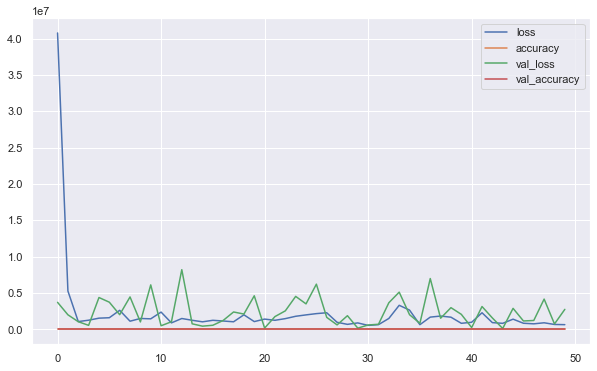

In [236]:
pd.DataFrame(history.history).plot(figsize=(10,6))

#### MPL With PCA For Feature Reduction

In [237]:
# Time series train/test split
tss= TimeSeriesSplit(n_splits=3)

# Keep all features, but remove the five target variables
X = netflix.iloc[:, :-5]
X = X.set_index("date")

# Create series for target 
y = netflix.iloc[:, -3]

# Split tranining and test data by date
for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [238]:
# Print index of train and test data to check that they are split correctly
print(X_train.index)
print(X_test.index)

DatetimeIndex(['2019-01-23', '2019-01-24', '2019-01-25', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01',
               '2019-02-04', '2019-02-05',
               ...
               '2021-06-25', '2021-06-28', '2021-06-29', '2021-06-30',
               '2021-07-01', '2021-07-02', '2021-07-06', '2021-07-07',
               '2021-07-08', '2021-07-09'],
              dtype='datetime64[ns]', name='date', length=541, freq=None)
DatetimeIndex(['2021-07-12', '2021-07-13', '2021-07-14', '2021-07-15',
               '2021-07-16', '2021-07-19', '2021-07-20', '2021-07-21',
               '2021-07-22', '2021-07-23',
               ...
               '2022-03-17', '2022-03-18', '2022-03-21', '2022-03-22',
               '2022-03-23', '2022-03-24', '2022-03-25', '2022-03-28',
               '2022-03-29', '2022-03-30'],
              dtype='datetime64[ns]', name='date', length=180, freq=None)


In [221]:
print(X_train.shape)
print(X_test.shape)

(541, 159)
(180, 159)


In [239]:
# PCA feature reduction. 20 components is enough to explain ~85% of the variance (refer to Feture_selection notebook)
sklearn_pca = PCA(n_components=20)
X_train_pca = sklearn_pca.fit_transform(X_train)
X_test_pca = sklearn_pca.transform(X_test)

# Standardize the data
scaler = StandardScaler()
X_train_pca = scaler.fit_transform(X_train_pca)
X_test_pca = scaler.fit_transform(X_test_pca)

In [240]:
# Build MPL model
n_features = X_train_pca.shape[1]
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(n_features,)))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

# Define early stopping callback
early_stopping_callback = tf.keras.callbacks.EarlyStopping(patience=3)

# Fit model
history = model.fit(X_train_pca, 
                    y_train, 
                    epochs=40, 
                    validation_data=(X_test_pca, y_test), 
                    batch_size=10,
                    callbacks=[early_stopping_callback])
history


Epoch 1/40
55/55 [==============================] - 1s 3ms/step - loss: 0.6991 - binary_accuracy: 0.5083 - val_loss: 0.7142 - val_binary_accuracy: 0.5056
Epoch 2/40
55/55 [==============================] - 0s 2ms/step - loss: 0.6930 - binary_accuracy: 0.5508 - val_loss: 0.7015 - val_binary_accuracy: 0.5111
Epoch 3/40
55/55 [==============================] - 0s 2ms/step - loss: 0.6750 - binary_accuracy: 0.5471 - val_loss: 0.7054 - val_binary_accuracy: 0.4944
Epoch 4/40
55/55 [==============================] - 0s 2ms/step - loss: 0.6656 - binary_accuracy: 0.5804 - val_loss: 0.7096 - val_binary_accuracy: 0.5000
Epoch 5/40
55/55 [==============================] - 0s 2ms/step - loss: 0.6530 - binary_accuracy: 0.6155 - val_loss: 0.7192 - val_binary_accuracy: 0.5278


In [205]:
# predict on test data
y_pred = model.predict(X_test_pca)

<AxesSubplot:>

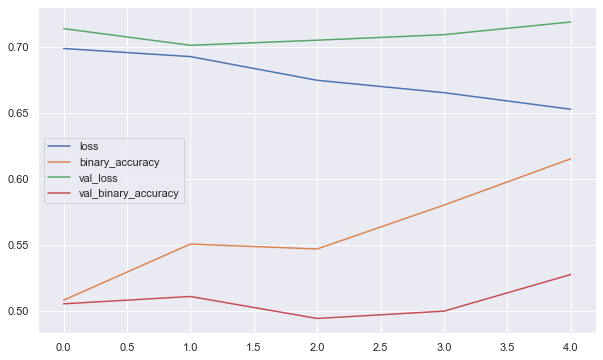

In [241]:
pd.DataFrame(history.history).plot(figsize=(10,6))

In [242]:
print('Train split:')
loss, acc = model.evaluate(X_train_pca, y_train, verbose=1)

print("Accuracy: %.2f%%" % (acc * 100))

Train split:
17/17 [==============================] - 0s 1ms/step - loss: 0.6323 - binary_accuracy: 0.6266
Accuracy: 62.66%


In [243]:
print('Test split:')
loss, acc = model.evaluate(X_test_pca, y_test, verbose=1)

print("Accuracy: %.2f%%" % (acc * 100))

Test split:
6/6 [==============================] - 0s 2ms/step - loss: 0.7192 - binary_accuracy: 0.5278
Accuracy: 52.78%


[Text(0, 0.5, 'True: 0'), Text(0, 1.5, 'True: 1')]

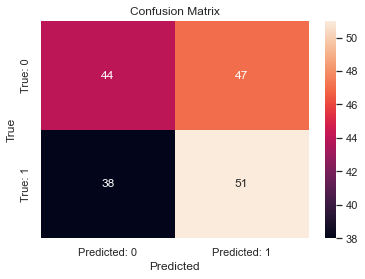

In [244]:
# Display confusion matrix results
from sklearn.metrics import confusion_matrix

ax = plt.subplot()
predicted = model.predict(X_test_pca)
predicted = (predicted > 0.5)

confusion = confusion_matrix(y_test, predicted)

sns.heatmap(confusion, annot=True, ax=ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(["Predicted: 0", "Predicted: 1"])
ax.yaxis.set_ticklabels(["True: 0", "True: 1"])

